In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# Exploratory Data Analysis - Metadata

# Data Loading

In [1]:
import sys
project_path = "/media/sarthak/HDD/TUM/courses/sem 3/practical DM/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [3]:
from src.data.json_loader import JSONLoader

In [4]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
file_path = '/media/sarthak/HDD/TUM/courses/sem 3/practical DM/datasets/meta_Electronics.json.gz'
loader = JSONLoader()

In [5]:
data = loader.load_data(file_path)

# Exploration

In [12]:
data.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [13]:
data.tail()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
498191,BT008V9J9U,http://ecx.images-amazon.com/images/I/313e6SJm...,Vehicle suction cup mount (replacement) NOTICE...,"[[Electronics, GPS & Navigation, GPS System Ac...",Suction Cup Mount,21.99,NaN,{'buy_after_viewing': ['B000EPFCC2']},Garmin
498192,BT008SXQ4C,http://ecx.images-amazon.com/images/I/31oF9oNv...,Quatech - 1 Port PCMCIA to DB-25 Parallel Adap...,"[[Electronics, Computers & Accessories, Cables...",Parallel PCMCIA Card 1PORT Epp,23.99,NaN,"{'also_bought': ['B000SR2H4W', 'B001Q7X0W6'], ...",NaN
498193,BT008G3W52,http://ecx.images-amazon.com/images/I/21WIrX5f...,C2G - 5m Ultma USB 2.0 A Mini B Cble,"[[Electronics, Computers & Accessories, Cables...",C2G / Cables to Go 5M Ultima USB 2.0 Cable,18.91,NaN,"{'bought_together': ['B0002D6QJO'], 'buy_after...",C2G
498194,BT008UKTMW,http://ecx.images-amazon.com/images/I/41TNAVmf...,Keyboard drawer.,"[[Electronics, Computers & Accessories, Cables...",Underdesk Keyboard Drawer,25.54,NaN,"{'also_viewed': ['B0002LD0ZY', 'B0002LCZP0', '...",Fellowes
498195,BT008T2BGK,http://ecx.images-amazon.com/images/I/41x-15rR...,Garmin USB to R232 Converter CableUSB to RS232...,"[[Electronics, Computers & Accessories, Cables...",USB To R232 Converter Cable,62.31,NaN,"{'also_viewed': ['B0007T27H8', 'B00425S1H8', '...",Garmin


In [11]:
data.shape

(498196, 9)

/home/sarthak/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=21.99, right=21.99
  'left=%s, right=%s') % (left, right))


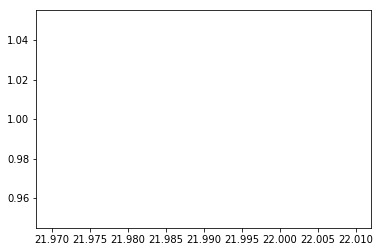

In [19]:
data.price.value_counts().plot(kind='line')